Shape of the DataFrame: (566, 18)

Data types of the columns:
 OBJECTID           int64
NAME_OF_SE        object
ALT_NAME          object
STREETNAME        object
WARD_S            object
PLANNING_U        object
LATITUDE          object
LONGITUDE         object
REGION            object
WATER_SUPP        object
SANITATION        object
REFUSE            object
ELECTRIC_2        object
UNIREFCODE        object
EST_HHC            int64
NUSP_CAT          object
Shape__Area      float64
Shape__Length    float64
dtype: object

Columns in the DataFrame:
 Index(['OBJECTID', 'NAME_OF_SE', 'ALT_NAME', 'STREETNAME', 'WARD_S',
       'PLANNING_U', 'LATITUDE', 'LONGITUDE', 'REGION', 'WATER_SUPP',
       'SANITATION', 'REFUSE', 'ELECTRIC_2', 'UNIREFCODE', 'EST_HHC',
       'NUSP_CAT', 'Shape__Area', 'Shape__Length'],
      dtype='object')

First few rows of the DataFrame:
    OBJECTID     NAME_OF_SE       ALT_NAME  \
0         1       Amatikwe                  
1         2  Congo Phase 2  Congo Pha

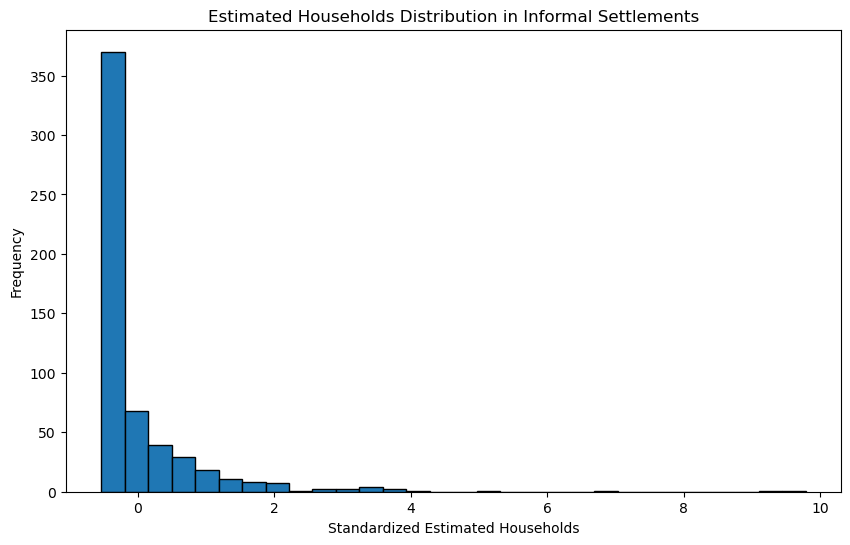

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Informal_Settlement_Programme_-1898186875815614491-checkpoint.csv'  # Update with your actual path if needed
df = pd.read_csv(file_path)

# Understanding the dataset
print("Shape of the DataFrame:", df.shape)
print("\nData types of the columns:\n", df.dtypes)
print("\nColumns in the DataFrame:\n", df.columns)
print("\nFirst few rows of the DataFrame:\n", df.head())

# Identify missing data
missing_data = df.isnull().sum()
print("\nMissing data in each column:\n", missing_data)

# Normalize 'EST_HHC' column (Estimated Households)
if 'EST_HHC' in df.columns:
    df['EST_HHC'] = (df['EST_HHC'] - df['EST_HHC'].mean()) / df['EST_HHC'].std()
    print("\n'EST_HHC' column normalized.")
else:
    print("\n'EST_HHC' column does not exist in the dataset.")

# Normalize 'WATER_SUPP' column (Water Supply) if it exists
if 'WATER_SUPP' in df.columns:
    # Assuming 'WATER_SUPP' is a categorical column, convert to numeric for normalization
    df['WATER_SUPP'] = df['WATER_SUPP'].astype('category').cat.codes
    df['WATER_SUPP'] = (df['WATER_SUPP'] - df['WATER_SUPP'].mean()) / df['WATER_SUPP'].std()
    print("\n'WATER_SUPP' column normalized.")
else:
    print("\n'WATER_SUPP' column does not exist in the dataset.")

# Display the data type of the 'EST_HHC' column (if it exists)
if 'EST_HHC' in df.columns:
    est_hhc_dtype = df['EST_HHC'].dtype
    print(f"\n'EST_HHC' column data type: {est_hhc_dtype}")
else:
    print("\n'EST_HHC' column is not available to check the data type.")

# Display the data type of the 'WATER_SUPP' column (if it exists)
if 'WATER_SUPP' in df.columns:
    water_supp_dtype = df['WATER_SUPP'].dtype
    print(f"\n'WATER_SUPP' column data type: {water_supp_dtype}")
else:
    print("\n'WATER_SUPP' column is not available to check the data type.")

# Plotting
# Histogram for 'EST_HHC' (assuming it represents some form of population data)
if 'EST_HHC' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['EST_HHC'], bins=30, edgecolor='k')
    plt.title('Estimated Households Distribution in Informal Settlements')
    plt.xlabel('Standardized Estimated Households')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\n'EST_HHC' column does not exist, cannot plot histogram.")
